In [25]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path=r"C:\Users\Efat\Desktop\seneca\semester5\BDA500\week8\SocialAds.csv"
data=pd.read_csv(path)
data.head()

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0
1,35.0,20000.0,0
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,0


In [34]:
data.tail()

,Age,EstimatedSalary,Purchased
395,46.0,41000.0,1
396,51.0,23000.0,1
397,50.0,20000.0,1
398,36.0,33000.0,0
399,49.0,36000.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              398 non-null    float64
 1   EstimatedSalary  396 non-null    float64
 2   Purchased        400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [5]:
data.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

<AxesSubplot:>

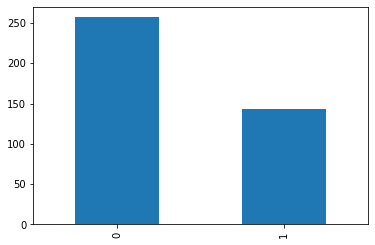

In [7]:
data.Purchased.value_counts().plot(kind='bar')

In [9]:
data.isnull().sum()

Age                2
EstimatedSalary    4
Purchased          0
dtype: int64

In [14]:
data[['Age','EstimatedSalary']].describe()

,Age,EstimatedSalary
count,398.000000,396.00000
mean,37.658291,69969.69697
std,10.480103,34112.23606
min,18.000000,15000.00000
25%,30.000000,43000.00000
50%,37.000000,70000.00000
75%,46.000000,88000.00000
max,60.000000,150000.00000


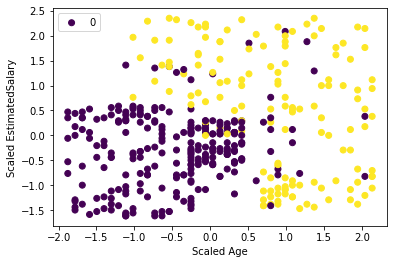

In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
plot_data=pd.DataFrame(scaler.fit_transform(data[['Age','EstimatedSalary']]),columns=['age','salary'])
plot_data['purchased']=data.Purchased
plt.scatter(plot_data.age, plot_data.salary, c=plot_data.purchased)
plt.xlabel('Scaled Age')
plt.ylabel('Scaled EstimatedSalary')
plt.legend([0,1])

<AxesSubplot:ylabel='Frequency'>

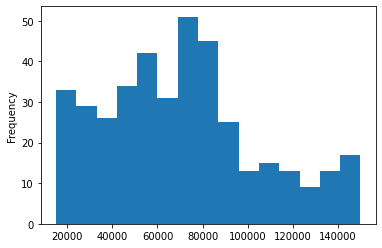

In [24]:
data.EstimatedSalary.plot.hist(bins=15)
#ax=data.EstimatedSalary.plot.density()

C:\Users\Efat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

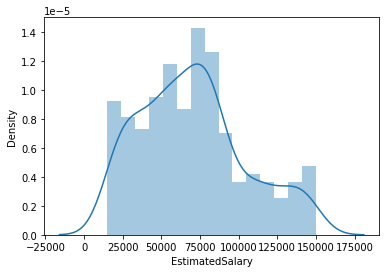

In [28]:
sns.distplot(data.EstimatedSalary, hist=True, kde= True, bins=15)

<AxesSubplot:ylabel='Frequency'>

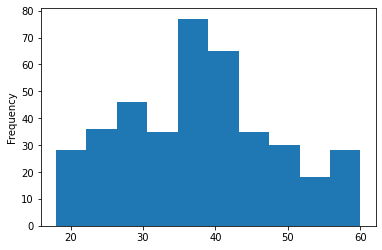

In [30]:
data.Age.plot.hist(bins=10)

C:\Users\Efat\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

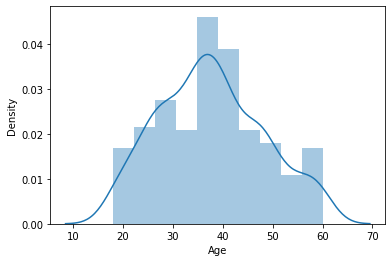

In [31]:
sns.distplot(data.Age, hist=True, kde=True, bins=10)

In [119]:
X=data[['Age','EstimatedSalary']]
y=data.Purchased

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train))
print(len(X_test))

320
80


In [121]:
X_train.isnull().sum()

Age                2
EstimatedSalary    0
dtype: int64

## custom imputer for imputing the null values

In [128]:
from sklearn.base import BaseEstimator, TransformerMixin
class Imputer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # Perform fillna transformation
        values={'Age':X['Age'].mode()[0], 'EstimatedSalary':X['EstimatedSalary'].mean()}
        return X.fillna(value=values)
    

# linear SVC

In [145]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

model1=Pipeline(steps=[
    ('imputer', Imputer()),
    ('scaler', StandardScaler()),
    ('linear_SVC', LinearSVC(C=1, loss="hinge"))
])

model1.fit(X_train, y_train)

Pipeline(steps=[('imputer', Imputer()), ('scaler', StandardScaler()),
                ('linear_SVC', LinearSVC(C=1, loss='hinge'))])

In [146]:
some_data=X_train[:10]
some_target=list(y_train[:10])
some_predictions=list(model1.predict(some_data))
print("some targets:     ", some_target)
print("some predictions: ", some_predictions)

some targets:      [0, 1, 1, 0, 1, 1, 0, 1, 0, 0]
some predictions:  [0, 0, 1, 0, 1, 0, 0, 1, 0, 0]


# SVC / kernel: linear

In [149]:
from sklearn.svm import SVC

model2=Pipeline(steps=[
    ('imputer', Imputer()),
    ('scaler', StandardScaler()),
    ('svc', SVC(C=1, kernel='linear', random_state=0))
])

model2.fit(X_train, y_train)

Pipeline(steps=[('imputer', Imputer()), ('scaler', StandardScaler()),
                ('svc', SVC(C=1, kernel='linear', random_state=0))])

In [150]:
some_predictions=list(model2.predict(some_data))
print("some targets:     ", some_target)
print("some predictions: ", some_predictions)

some targets:      [0, 1, 1, 0, 1, 1, 0, 1, 0, 0]
some predictions:  [0, 0, 1, 0, 1, 0, 0, 1, 0, 0]


# SGD Classifier

In [151]:
from sklearn.linear_model import SGDClassifier

model3=Pipeline(steps=[
    ('imputer', Imputer()),
    ('scaler', StandardScaler()),
    ('sgd', SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001))
])

model3.fit(X_train, y_train)

Pipeline(steps=[('imputer', Imputer()), ('scaler', StandardScaler()),
                ('sgd', SGDClassifier())])

In [152]:
some_predictions=list(model3.predict(some_data))
print("some targets:     ", some_target)
print("some predictions: ", some_predictions)

some targets:      [0, 1, 1, 0, 1, 1, 0, 1, 0, 0]
some predictions:  [0, 0, 1, 0, 1, 0, 0, 1, 0, 0]


# SVC / kernel: rbf

In [155]:
model4=Pipeline(steps=[
    ('imputer', Imputer()),
    ('scaler', StandardScaler()),
    ('svc_rbf', SVC(C=1, kernel='rbf', random_state=0))
])

model4.fit(X_train, y_train)

Pipeline(steps=[('imputer', Imputer()), ('scaler', StandardScaler()),
                ('svc_rbf', SVC(C=1, random_state=0))])

In [156]:
some_predictions=list(model4.predict(some_data))
print("some targets:     ", some_target)
print("some predictions: ", some_predictions)

some targets:      [0, 1, 1, 0, 1, 1, 0, 1, 0, 0]
some predictions:  [0, 1, 1, 1, 1, 1, 0, 1, 0, 0]


# SVC/ kernel: poly

In [180]:
model5=Pipeline(steps=[
    ('imputer', Imputer()),
    ('scaler', StandardScaler()),
    ('svc_poly', SVC(C=1, kernel='poly', degree=3, random_state=0))
])

model5.fit(X_train, y_train)

Pipeline(steps=[('imputer', Imputer()), ('scaler', StandardScaler()),
                ('svc_poly', SVC(C=1, kernel='poly', random_state=0))])

In [193]:
some_predictions=list(model5.predict(some_data))
print("some targets:     ", some_target)
print("some predictions: ", some_predictions)

some targets:      [0, 1, 1, 0, 1, 1, 0, 1, 0, 0]
some predictions:  [0, 0, 1, 0, 1, 0, 0, 0, 0, 0]


# hyperparameter tunning with RandomizedSearchCV

In [235]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

svc= SVC(random_state=0) 
param_distributions = {'gamma': reciprocal(0.001, 0.1), 'C': uniform(1, 10)}
                       
preprocess =Pipeline(steps=[
    ('imputer', Imputer()),
    ('scaler', StandardScaler())])

rnd_search_cv= RandomizedSearchCV(svc, param_distributions, 
                                   n_iter=10, verbose=2, cv=3, random_state=0)


X_train_rnd_search= preprocess.fit_transform(X_train)

rnd_search_cv.fit(X_train_rnd_search, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ...C=6.4881350392732475, gamma=0.026938830192854094; total time=   0.0s
[CV] END ...C=6.4881350392732475, gamma=0.026938830192854094; total time=   0.0s
[CV] END ...C=6.4881350392732475, gamma=0.026938830192854094; total time=   0.0s
[CV] END ....C=7.027633760716439, gamma=0.012296071107325704; total time=   0.0s
[CV] END ....C=7.027633760716439, gamma=0.012296071107325704; total time=   0.0s
[CV] END ....C=7.027633760716439, gamma=0.012296071107325704; total time=   0.0s
[CV] END ....C=5.236547993389047, gamma=0.019578897201212996; total time=   0.0s
[CV] END ....C=5.236547993389047, gamma=0.019578897201212996; total time=   0.0s
[CV] END ....C=5.236547993389047, gamma=0.019578897201212996; total time=   0.0s
[CV] END ....C=5.375872112626925, gamma=0.060749960734256925; total time=   0.0s
[CV] END ....C=5.375872112626925, gamma=0.060749960734256925; total time=   0.0s
[CV] END ....C=5.375872112626925, gamma=0.060749

RandomizedSearchCV(cv=3, estimator=SVC(random_state=0),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C1C4804820>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C1C48AAC40>},
                   random_state=0, verbose=2)

In [236]:
rnd_search_cv.best_estimator_

SVC(C=6.680445610939323, gamma=0.070989362574059, random_state=0)

In [212]:
rnd_search_cv.best_score_

0.8967848116146477

# fitting a model with the provided tunned hyperparameters

In [237]:
model6=Pipeline(steps=[
    ('imputer', Imputer()),
    ('scaler', StandardScaler()),
    ('svc_tunned', SVC(C=6.680445610939323,gamma=0.070989362574059, random_state=0))
])

model6.fit(X_train, y_train)

Pipeline(steps=[('imputer', Imputer()), ('scaler', StandardScaler()),
                ('svc_tunned',
                 SVC(C=6.680445610939323, gamma=0.070989362574059,
                     random_state=0))])

In [238]:
some_predictions=list(model6.predict(some_data))
print("some targets:     ", some_target)
print("some predictions: ", some_predictions)

some targets:      [0, 1, 1, 0, 1, 1, 0, 1, 0, 0]
some predictions:  [0, 1, 1, 0, 1, 1, 0, 1, 0, 0]


# models' evaluation and comparison

In [198]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


## accuracy score

In [239]:
from sklearn.metrics import accuracy_score
models=[model1, model2, model3, model4, model5, model6]

for model in models:
    
    score=accuracy_score(y_train, model.predict(X_train))
    print("{} accuracy score: {}".format(model.steps[2][0], score))

linear_SVC accuracy score: 0.828125
svc accuracy score: 0.825
sgd accuracy score: 0.828125
svc_rbf accuracy score: 0.90625
svc_poly accuracy score: 0.83125
svc_tunned accuracy score: 0.896875


In [240]:

for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy")
    print("{} cross validation accuracy score: {}".format(model.steps[2][0], scores.mean()))

linear_SVC cross validation accuracy score: 0.825
svc cross validation accuracy score: 0.825
sgd cross validation accuracy score: 0.778125
svc_rbf cross validation accuracy score: 0.903125
svc_poly cross validation accuracy score: 0.828125
svc_tunned cross validation accuracy score: 0.896875


## confusion matrix, precision, recall, and f1 score

In [241]:
for model in models:
    y_pred = cross_val_predict(model, X_train, y_train, cv=10)
    print("confusion matrix of {}: \n {}".format(model.steps[2][0],confusion_matrix(y_train, y_pred)))
    print("precision: ", precision_score(y_train, y_pred))
    print("recall: ", recall_score(y_train, y_pred))
    print("f1 score: ", f1_score(y_train, y_pred))
    print("-------------------------------------")

confusion matrix of linear_SVC: 
 [[191  14]
 [ 42  73]]
precision:  0.8390804597701149
recall:  0.6347826086956522
f1 score:  0.7227722772277227
-------------------------------------
confusion matrix of svc: 
 [[191  14]
 [ 42  73]]
precision:  0.8390804597701149
recall:  0.6347826086956522
f1 score:  0.7227722772277227
-------------------------------------
confusion matrix of sgd: 
 [[175  30]
 [ 36  79]]
precision:  0.7247706422018348
recall:  0.6869565217391305
f1 score:  0.7053571428571429
-------------------------------------
confusion matrix of svc_rbf: 
 [[186  19]
 [ 12 103]]
precision:  0.8442622950819673
recall:  0.8956521739130435
f1 score:  0.869198312236287
-------------------------------------
confusion matrix of svc_poly: 
 [[197   8]
 [ 47  68]]
precision:  0.8947368421052632
recall:  0.591304347826087
f1 score:  0.7120418848167539
-------------------------------------
confusion matrix of svc_tunned: 
 [[189  16]
 [ 17  98]]
precision:  0.8596491228070176
recall:  0.85

# final model : model 4

SVC(C=1, kernel='rbf', gamma='scale', random_state=0)

# evaluating the final model on the test set

In [229]:
# accuracy score
y_pred_test=model4.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.925

In [230]:
#cross validation accuracy score
scores = cross_val_score(model4, X_test, y_test, cv=5, scoring="accuracy")
print("cross validation accuracy score: {}".format(scores.mean()))

cross validation accuracy score: 0.9125


In [232]:
#confusion matrix, precision, recall, f1 score
y_pred_cross_test = cross_val_predict(model4, X_test, y_test, cv=5)
print("confusion matrix of {}: \n {}".format(model4.steps[2][0],confusion_matrix(y_test, y_pred_cross_test)))
print("precision: ", precision_score(y_test, y_pred_cross_test))
print("recall: ", recall_score(y_test, y_pred_cross_test))
print("f1 score: ", f1_score(y_test, y_pred_cross_test))

confusion matrix of svc_rbf: 
 [[49  3]
 [ 4 24]]
precision:  0.8888888888888888
recall:  0.8571428571428571
f1 score:  0.8727272727272727


### fitting the chosen model on the whole dataset to create a model ready to be used for the future data predictions

In [233]:
model4.fit(X,y)

Pipeline(steps=[('imputer', Imputer()), ('scaler', StandardScaler()),
                ('svc_rbf', SVC(C=1, random_state=0))])